In [4]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [5]:
import Data

data,sta,date,lon,lat,P,d,t,s,Tr,fluo,oxy_uM,oxy_mL,rho,isop,si,ti,NO3_1,NO3_2,PO3_1,PO3_2,SiO4_1,SiO4_2,nut = Data.AllData_variables()
PaThData,PaTh_sta,PaTh_lon,PaTh_lat,PaTh_t,PaTh_s,PaTh_rho,PaTh_d = Data.PaTh_variables()
listAllSta,listPaThSta,PaThDataSorted,PaThSort_sta,PaThSort_d,Pa,Th,PaTh,PaErr,ThErr,PaThErr = Data.PaTh_varSorted()

/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/DerivVar.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  isop = np.zeros((ydim,xdim))


354.0 13.0


/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


354.0 13.0
354.0 13.0


/home/mgrenier/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.


354.0 13.0


In [6]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.figure as mfig
import matplotlib.image as mpimg
#import seawater.gibbs as gsw

import netCDF4 as nc
import numpy as np
import scipy.io as sio
import pandas as pd
import pickle as pl
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

from salishsea_tools import nc_tools
from salishsea_tools import viz_tools
from salishsea_tools import  psu_tools

from matplotlib.pyplot import *
#from seabird.cnv import fCNV

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [7]:
#dir()
#locals()
#globals()

# All stations

In [8]:
'''
figx = pl.load(open('PaThStationsGreyPal_Map.pickle', 'rb'))
figx.show()
'''

"\nfigx = pl.load(open('PaThStationsGreyPal_Map.pickle', 'rb'))\nfigx.show()\n"

In [9]:
#im = plt.imread('/ocean/mgrenier/geotraces/research/Geotraces2015data/PaThStationsGreyPal_Map.png') #I want to add a pdf if possible!
#plt.imshow(im)

In [10]:
si,ti,isop
s.min(),s.max()
#clabel?
listPaThSta

['K1',
 'LS2',
 'BB1',
 'BB3',
 'BB2',
 'CB2',
 'CB3',
 'CB4',
 '308/CAA8',
 'KC 500-2007',
 'KC 2000-2007',
 'KC 2700-2007',
 'A01-95',
 'L1.1-2009',
 'L2-2009',
 'L3-2009',
 '2',
 '93']

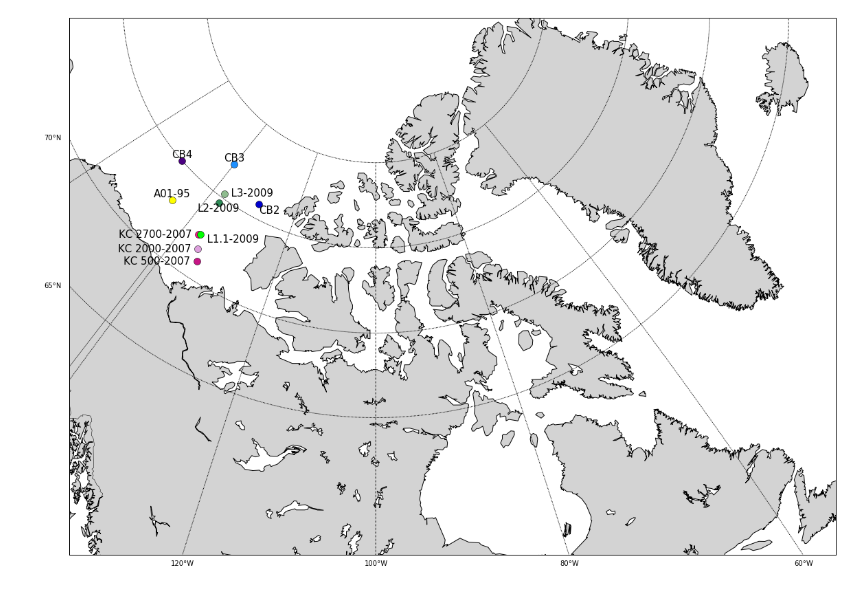

In [11]:
img1=mpimg.imread('/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/Figures/PaThStations-CBcompar_Map.png')
fig = plt.figure(figsize=(20, 10)) 
plt.imshow(img1);
plt.axis('off');

In [12]:
#data[(sta == 'CB4') & (data['Cast name'] == 'TM1')]

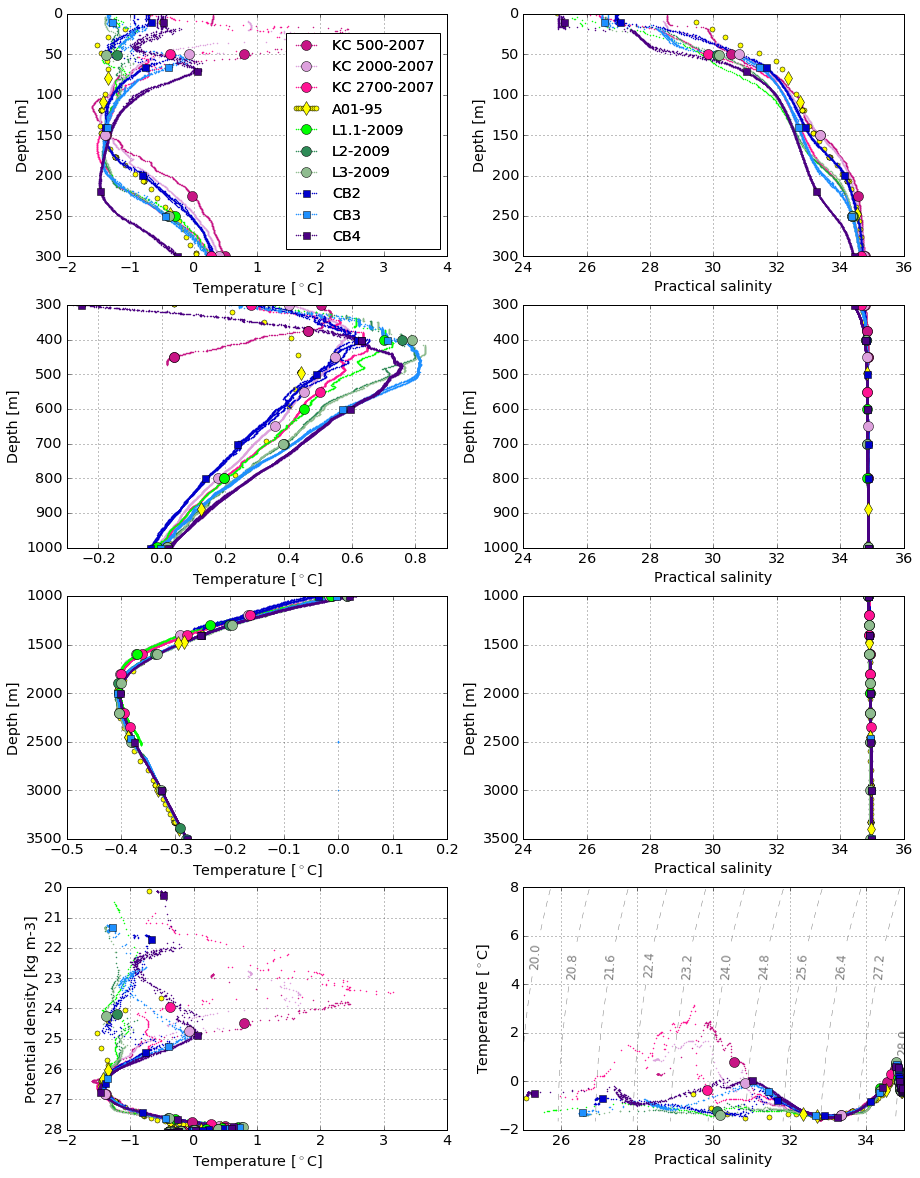

In [13]:
import matplotlib.pyplot as plt

fig,((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7,ax8))=plt.subplots(4,2,facecolor='w',figsize=(15,20))

CS=ax8.contour(si,ti,isop,45, linestyles='dashed',linewidths = 0.5, colors='grey')
ax8.clabel(CS, fontsize=12, inline=1, fmt='%0.1f') # Label every second level


for station,M,S,C in zip(('KC 500-2007', 'KC 2000-2007', 'KC 2700-2007', 'A01-95', 'L1.1-2009', 'L2-2009',
                          'L3-2009','CB2','CB3','CB4'),
                        ('.','.','.','o','.','.','.','.','.','.'),
                        (2,2,2,5,2,2,2,2,2,2),('mediumvioletred','plum','deeppink','yellow','lime','seagreen',
                                             'darkseagreen','mediumblue','dodgerblue','indigo')):
    for ax,xfield,yfield,xlabels,ylabels,xranges,yranges in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8),(t,s,t,s,t,s,t,s),
                                    (d,d,d,d,d,d,rho,t),
                                    ('Temperature [$^\circ$C]','Practical salinity','Temperature [$^\circ$C]','Practical salinity','Temperature [$^\circ$C]','Practical salinity','Temperature [$^\circ$C]','Practical salinity'),
                                    ('Depth [m]','Depth [m]','Depth [m]','Depth [m]','Depth [m]','Depth [m]','Potential density [kg m-3]','Temperature [$^\circ$C]'),
                                    ([-2,4],[24, 36],[-0.3,0.9],[24, 36],[-0.5,0.2],[24, 36],[-2,4],[25, 35]),
                                    ([0,300],[0, 300],[300,1000],[300, 1000],[1000,3500],[1000, 3500],[20,28],[-2, 8])):
        ax.plot(xfield[sta == station],yfield[sta == station],M,markersize=S,color=C,label=station)
        ax.set_xlim(xranges)
        ax.set_ylim(yranges)
        ax.set_xlabel(xlabels)
        ax.set_ylabel(ylabels)
        ax.invert_yaxis()


#CS = plt.contour(si,ti,dens, linestyles='dashed', colors='k')

'''ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax4.set_yscale('log')'''


#ax3.legend(numpoints=10)
CTD=ax1.legend(numpoints=10,loc='best',framealpha=1)
ax8.invert_yaxis()



# Plot Pa/Th samples on hydrological profiles


for station,M,S,C in zip(('KC 500-2007', 'KC 2000-2007', 'KC 2700-2007', 'A01-95', 'L1.1-2009', 'L2-2009',
                          'L3-2009','CB2','CB3','CB4'),
                        ('o','o','o','d','o','o','o','s','s','s'),
                        (10,10,10,10,10,10,10,7,7,7),
                        ('mediumvioletred','plum','deeppink','yellow','lime','seagreen',
                        'darkseagreen','mediumblue','dodgerblue','indigo')):
    for ax,xfield,yfield in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8),
                                    (PaTh_t,PaTh_s,PaTh_t,PaTh_s,PaTh_t,PaTh_s,PaTh_t,PaTh_s),
                                    (PaTh_d,PaTh_d,PaTh_d,PaTh_d,PaTh_d,PaTh_d,PaTh_rho,PaTh_t),
                                    ):
     
        ax.plot(xfield[sta == station],yfield[sta == station],M,markersize=S,color=C,label=station)

    

for ax, in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8)):
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_axisbelow(True)

handles, labels = ax1.get_legend_handles_labels()

ax1.legend(handles[10:20],labels[10:20],loc='best',numpoints=1,framealpha=0,frameon=False)
ax1.add_artist(CTD)
savefig('Figures/PaThStations_CanadaBasin_TandSvsd-color.png',bbox_inches='tight')


plt.show()


In [14]:
'''handles, labels = ax1.get_legend_handles_labels()
len(handles)
labels[9:18],handles[9:18]
'''

'handles, labels = ax1.get_legend_handles_labels()\nlen(handles)\nlabels[9:18],handles[9:18]\n'